In [1]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('merged_payments_samples.csv')

C:\Users\jeffe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3,7,14,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,LOAN_ID,MONTHLY_REPORTING_PERIOD,CURRENT_ACTUAL_UPB,CURRENT_LOAN_DELINQUENCY_STATUS,LOAN_AGE,REMAINING_MONTHS_TO_LEGAL_MATURITY,REPURCHASE_FLAG,MODIFICATION_FLAG,ZERO_BALANCE_CODE,ZERO_BALANCE_EFFECTIVE_DATE,...,NET_SALES_PROCEEDS,NON_MI_RECOVERIES,EXPENSES,LEGAL_COSTS,MAINTENANCE_AND_PRESERVATION_COSTS,TAXES_AND_INSURANCE,MISCELLANEOUS_EXPENSES,ACTUAL_LOSS_CALCULATION,MODIFICATION_COST,STEP_MODIFICATION_FLAG
0,F199Q1000012,200209,42011.81,0,43,316,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F199Q1000012,200210,41964.77,0,44,315,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F199Q1000012,200211,41917.46,0,45,314,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F199Q1000012,200212,41869.88,0,46,313,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F199Q1000012,200301,0.00,0,47,312,N,NaN,1.0,200301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42101961 entries, 0 to 42101960
Data columns (total 24 columns):
LOAN_ID                               object
MONTHLY_REPORTING_PERIOD              int64
CURRENT_ACTUAL_UPB                    float64
CURRENT_LOAN_DELINQUENCY_STATUS       object
LOAN_AGE                              int64
REMAINING_MONTHS_TO_LEGAL_MATURITY    int64
REPURCHASE_FLAG                       object
MODIFICATION_FLAG                     object
ZERO_BALANCE_CODE                     float64
ZERO_BALANCE_EFFECTIVE_DATE           float64
CURRENT_INTEREST_RATE                 float64
CURRENT_DEFERRED_UPB                  float64
DUE_DATE_LAST_PAID_INSTALLMENT        float64
MI_RECOVERIES                         float64
NET_SALES_PROCEEDS                    object
NON_MI_RECOVERIES                     float64
EXPENSES                              float64
LEGAL_COSTS                           float64
MAINTENANCE_AND_PRESERVATION_COSTS    float64
TAXES_AND_INSURANCE   

## Loan ID

Unique identifier assigned to each loan.

F1YYQnXXXXXX

F1 = product (Fixed Rate Mortgage);

YYQn = origination year and quarter; and,

XXXXXX = randomly assigned digits

In [5]:
df.LOAN_ID.str[2:4].value_counts()

05    3629141
04    3606143
03    3602136
06    2953545
07    2742215
09    2597032
12    2546367
10    2528051
11    2341823
99    2319588
08    2235257
02    2166030
13    2134666
01    1776294
14    1586753
00    1338978
15    1218207
16     694435
17      85300
Name: LOAN_ID, dtype: int64

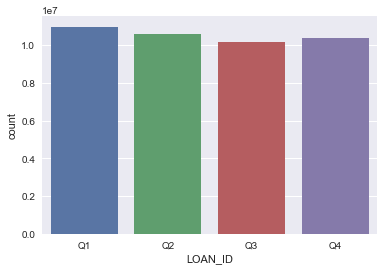

In [6]:
sns.countplot(df.LOAN_ID.str[4:6])

Seems like more people sign mortgages in the first quarter.

## MONTHLY REPORTING PERIOD

The as-of month for loan information contained in the loan record. YYYYMM

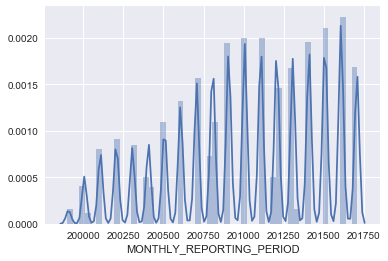

In [7]:
sns.distplot(df.MONTHLY_REPORTING_PERIOD)

## CURRENT ACTUAL UPB
The Current Actual UPB reflects the mortgage ending balance as reported by the servicer for the corresponding monthly reporting period. For fixed rate mortgages, this UPB is derived from the mortgage balance as reported by the servicer and includes any scheduled and unscheduled principal reductions applied to the mortgage.

For mortgages with loan modifications, as indicated by “Y” in the Modification Flag field, the current actual unpaid principal balance may or may not include partial principal forbearance. If applicable, for loans with partial principal forbearance, the current actual unpaid principal balance equals the sum of interest bearing UPB (the amortizing principal balance of the mortgage) and the deferred UPB (the principal forbearance balance).

Current UPB will be rounded to the nearest $1,000 for the first 6 months after origination date. This was previously reported as zero for the first 6 months after the origination date.

**Calculation:**

(interest bearing UPB) + (non- interest bearing UPB)

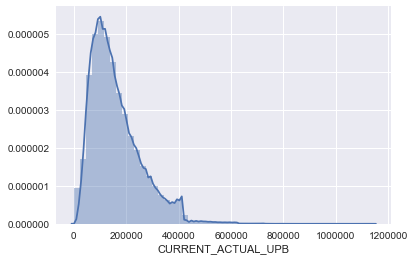

In [8]:
sns.distplot(df.CURRENT_ACTUAL_UPB)

As noted in the data dictionary, we see a spike at 0 because this value is reported as 0 for the first 6 monthes after the ink dries on the mortgage. Plot below shows the dist with values > than zero.

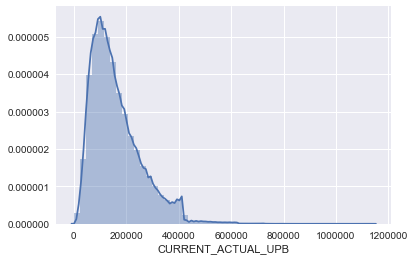

In [9]:
sns.distplot(df.CURRENT_ACTUAL_UPB[df.CURRENT_ACTUAL_UPB>0])

## CURRENT LOAN DELINQUENCY STATUS
A value corresponding to the number of days the borrower is delinquent, based on the due date of last paid installment (“DDLPI”) reported by servicers to Freddie Mac, and is calculated under the Mortgage Bankers Association (MBA) method.

If a loan has been acquired by REO, then the Current Loan Delinquency Status will reflect the value corresponding to that status (instead of the value corresponding to the number of days the borrower is delinquent).

In [10]:
df.CURRENT_LOAN_DELINQUENCY_STATUS.value_counts().iloc[:10]

0    30970302
0     9682045
1      608233
2      181407
3       85585
4       61364
5       50069
6       41783
7       35585
8       30859
Name: CURRENT_LOAN_DELINQUENCY_STATUS, dtype: int64

In [11]:
df.CURRENT_LOAN_DELINQUENCY_STATUS[df.CURRENT_LOAN_DELINQUENCY_STATUS != 'R'].value_counts()

0      30970302
0       9682045
1        608233
2        181407
3         85585
4         61364
5         50069
6         41783
7         35585
8         30859
1         30804
9         27022
10        23646
11        20696
12        18362
13        16377
14        14447
15        12818
16        11427
17        10201
18         9210
19         8322
20         7683
21         7009
22         6434
23         5986
2          5493
24         5457
25         5062
26         4640
         ...   
47            4
46            4
48            4
43            4
42            4
45            4
40            4
44            4
41            4
116           3
50            3
49            3
115           3
118           2
120           2
119           2
124           2
XX            2
122           2
121           2
117           2
51            2
126           1
125           1
56            1
55            1
54            1
53            1
52            1
123           1
Name: CURRENT_LOAN_DELIN

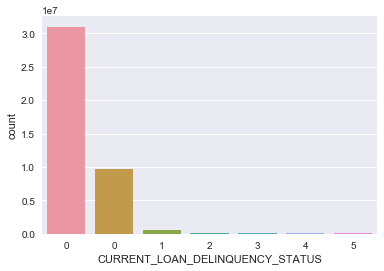

In [12]:
sns.countplot(df.CURRENT_LOAN_DELINQUENCY_STATUS[df.CURRENT_LOAN_DELINQUENCY_STATUS != 'R'],order=df.CURRENT_LOAN_DELINQUENCY_STATUS[df.CURRENT_LOAN_DELINQUENCY_STATUS != 'R'].value_counts().iloc[:7].index)

## LOAN AGE
The number of months since the note origination month of the mortgage.

To ensure the age measurement commences with the first full month after the note origination month, subtract 1.

**Calculation:**

((Monthly Reporting Period) – Loan Origination Date (MM/YY)) – 1 month

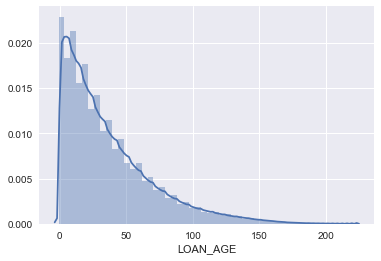

In [13]:
sns.distplot((df.LOAN_AGE - 1))

## REMAINING MONTHS TO LEGAL MATURITY
The remaining number of months to the mortgage maturity date.

For mortgages with loan modifications, as indicated by “Y” in the Modification Flag field, the calculation uses the modified maturity date.

**Calculation:**

(Maturity Date (MM/YY) – Monthly Reporting Period (MM/YY)

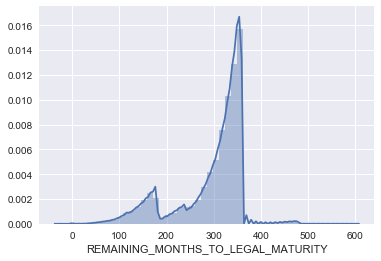

In [14]:
sns.distplot(df.REMAINING_MONTHS_TO_LEGAL_MATURITY)

## REPURCHASE FLAG

Indicates loans that have been repurchased or made whole (not inclusive of pool-level repurchase settlements).

This field is only populated only at loan termination month.

N = Not Repurchased

Y = Repurchased

Space (1) = Not Applicable

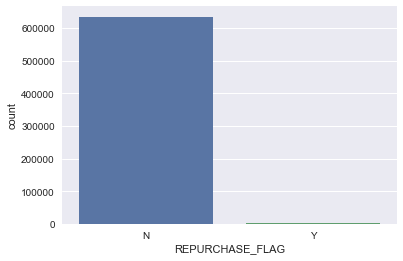

In [15]:
sns.countplot(df.REPURCHASE_FLAG)

## MODIFICATION FLAG
For mortgages with loan modifications, indicates that the loan has been modified.

Y = Yes

Space (1) = Not Modified

In [16]:
len(df.MODIFICATION_FLAG[df.MODIFICATION_FLAG.notnull()])

15667

In [17]:
len(df.MODIFICATION_FLAG[df.MODIFICATION_FLAG.isnull()])

42086294

## ZERO BALANCE CODE
A code indicating the reason the loan's balance was reduced to zero.

01 = Prepaid or Matured (Voluntary Payoff)

03 = Foreclosure Alternative Group (Short Sale, Third Party Sale or Charge Off)

06 = Repurchase prior to Property Disposition

09 = REO Disposition

15 = Note sale/Reperforming sale

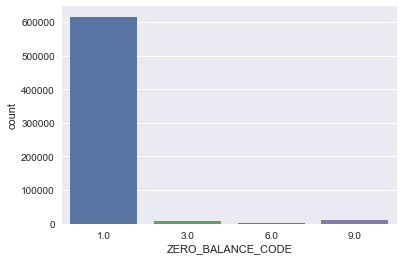

In [18]:
sns.countplot(df.ZERO_BALANCE_CODE)

## ZERO BALANCE EFFECTIVE DATE
The date on which the event triggering the Zero Balance Code took place.


YYYYMM

Space(6) = Not Applicable

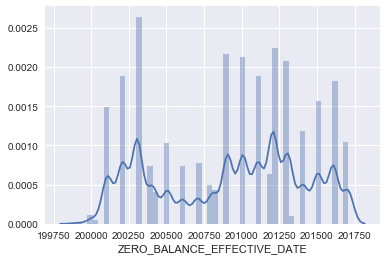

In [19]:
sns.distplot(df.ZERO_BALANCE_EFFECTIVE_DATE[df.ZERO_BALANCE_EFFECTIVE_DATE.notnull()])

## CURRENT INTEREST RATE
Reflects the current interest rate on the mortgage note, taking into account any loan modifications.

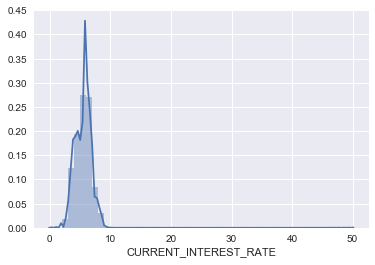

In [20]:
sns.distplot(df.CURRENT_INTEREST_RATE)

## CURRENT DEFERRED UPB
The current non-interest bearing UPB of the modified mortgage.

$ Amount. Non-Interest Bearing UPB.

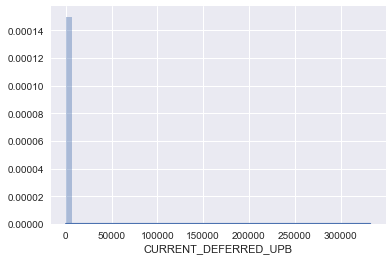

In [21]:
sns.distplot(df.CURRENT_DEFERRED_UPB)

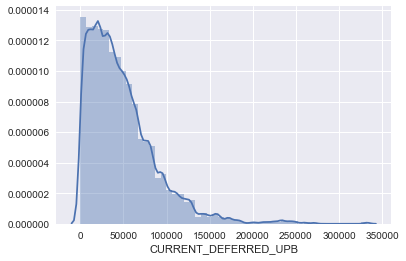

In [22]:
sns.distplot(df.CURRENT_DEFERRED_UPB[df.CURRENT_DEFERRED_UPB > 0])

## DUE DATE OF LAST PAID INSTALLMENT (DDLPI)
The due date that the loan’s scheduled principal and interest is paid through, regardless of when the installment payment was actually made.

YYYYMM

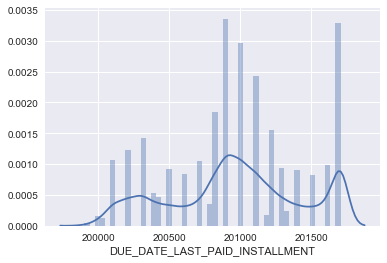

In [23]:
sns.distplot(df.DUE_DATE_LAST_PAID_INSTALLMENT[df.DUE_DATE_LAST_PAID_INSTALLMENT.notnull()])

## MI RECOVERIES
Mortgage Insurance Recoveries are proceeds received by Freddie Mac in the event of credit losses. These proceeds are based on claims under a mortgage insurance policy.

$ Amount. MI Recoveries.

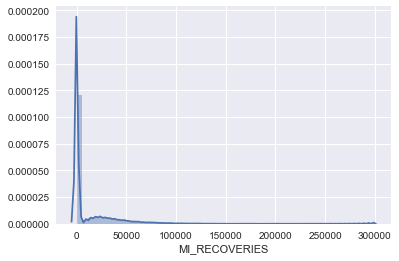

In [24]:
sns.distplot(df.MI_RECOVERIES[df.MI_RECOVERIES.notnull()])

0 MI_RECOVERIES is skewing our distplot, lets look at the cases where there is mortgage insurance.

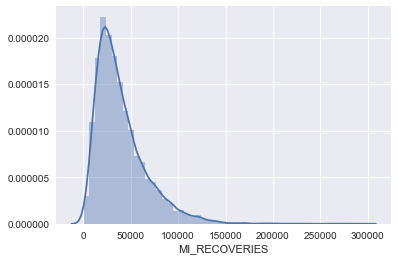

In [25]:
sns.distplot(df.MI_RECOVERIES[df.MI_RECOVERIES.notnull() & df.MI_RECOVERIES>0])

Let's examine the tail

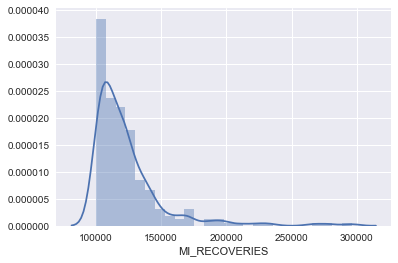

In [38]:
sns.distplot(df.MI_RECOVERIES[(df.MI_RECOVERIES.notnull()) & (df.MI_RECOVERIES>100000)])

## NET SALES PROCEEDS
The amount remitted to Freddie Mac resulting from a property disposition or loan sale (which in the case of bulk sales, may be an allocated amount) once allowable selling expenses have been deducted from the gross sales proceeds.

A value of “C” in Net Sales Proceeds stands for Covered, which means that as part of the property disposition process, Freddie Mac was “Covered” for its total indebtedness (defined as UPB at disposition plus delinquent accrued interest) and net sale proceeds covered default expenses incurred by Servicer during the disposal of the loan.

A value of “U” indicates that the amount is unknown.

$ Amount. Gross Sale Proceeds – Allowable Selling Expenses.

C = Covered U = Unknown

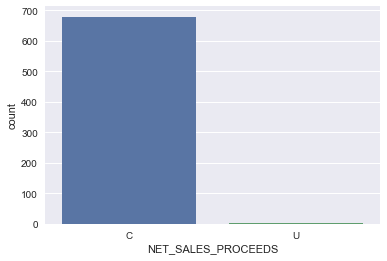

In [27]:
sns.countplot(df.NET_SALES_PROCEEDS[(df.NET_SALES_PROCEEDS=='C')|(df.NET_SALES_PROCEEDS=='U')])

## NON MI RECOVERIES
Non-MI Recoveries are proceeds received by Freddie Mac based on repurchase/make whole proceeds, non-sale income such as refunds (tax or insurance), hazard insurance proceeds, rental receipts, positive escrow and/or other miscellaneous credits.

$ Amount. Non MI Recoveries.

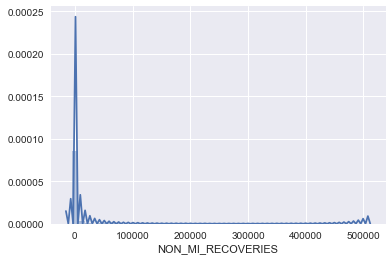

In [29]:
sns.distplot(df.NON_MI_RECOVERIES[df.NON_MI_RECOVERIES.notnull()])

Most of the NON_MI_RECOVERIES are on the lowend, let's focus in on these.

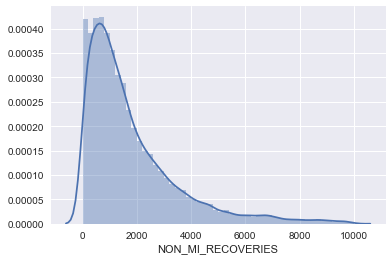

In [30]:
sns.distplot(df.NON_MI_RECOVERIES.dropna()[(df.NON_MI_RECOVERIES.dropna() > 0) & (df.NON_MI_RECOVERIES.dropna() < 10000)])

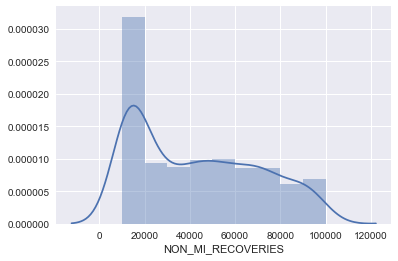

In [31]:
sns.distplot(df.NON_MI_RECOVERIES.dropna()[(df.NON_MI_RECOVERIES.dropna() > 10000) & (df.NON_MI_RECOVERIES.dropna() < 100000)])

There's probably a good story behind this! Why would Freddie Mac receive this much in "repurchase/make whole proceeds, non-sale income such as refunds (tax or insurance), hazard insurance proceeds, rental receipts, positive escrow and/or other miscellaneous credits"??

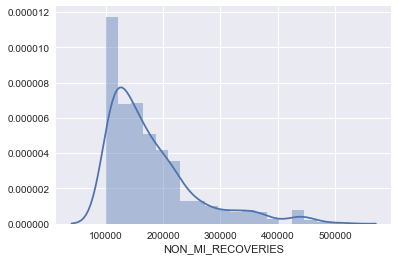

In [44]:
sns.distplot(df.NON_MI_RECOVERIES.dropna()[(df.NON_MI_RECOVERIES.dropna() > 100000) & (df.NON_MI_RECOVERIES.dropna() < 600000)])

Above our extreme outliers.

## EXPENSES
Expenses will include allowable expenses that Freddie Mac bears in the process of acquiring, maintaining and/ or disposing a property (excluding selling expenses, which are subtracted from gross sales proceeds to derive net sales proceeds). This is an aggregation of Legal Costs, Maintenance and Preservation Costs, Taxes and Insurance, and Miscellaneous Expenses.

$ Amount. Allowable Expenses.

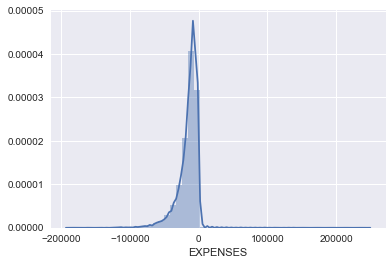

In [32]:
sns.distplot(df.EXPENSES.dropna())

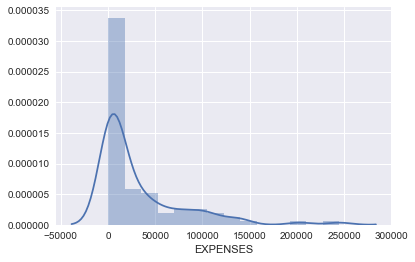

In [33]:
sns.distplot(df.EXPENSES.dropna()[df.EXPENSES.dropna() > 0])

Is this a mistake in the data? Why would there expenses ever be positive?

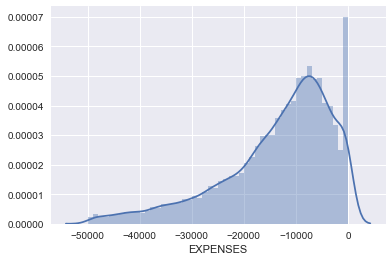

In [34]:
sns.distplot(df.EXPENSES.dropna()[(df.EXPENSES.dropna() > -50000) & (df.EXPENSES.dropna() < 0)])

## LEGAL COSTS

The amount of legal costs associated with the sale of a property (but not included in Net Sale Proceeds). Prior to population of a Zero Balance Code equal to 03 or 09, this field will be populated as “Not Applicable,” Following population of a Zero Balance Code equal to 03 or 09, this field will be updated (as applicable) to reflect the cumulative total.

$ Amount
Space(12) – Not applicable

## MAINTENANCE AND PRESERVATION COSTS
The amount of maintenance, preservation, and repair costs, including but not limited to property inspection, homeowner’s association, utilities, and REO management, that is associated with the sale of a property (but not included in Net Sale Proceeds). Prior to population of a Zero Balance Code equal to 03 or 09, this field will be populated as “Not Applicable,” Following population of a Zero Balance Code equal to 03 or 09, this field will be updated (as applicable) to reflect the cumulative total.

$ Amount
Space(12) – Not applicable

## TAXES AND INSURANCE
The amount of taxes and insurance owed that are associated with the sale of a property (but not included in Net Sale Proceeds). Prior to population of a Zero Balance Code equal to 03 or 09, this field will be populated as “Not Applicable,”. Following population of a Zero Balance Code equal to 03 or 09, this field will be updated (as applicable) to reflect the cumulative total. $ Amount Space(12) – Not applicable

## MISCELLANEOUS EXPENSES
Miscellaneous expenses associated with the sale of a property (but not included in Net Sale Proceeds). Prior to population of a Zero Balance Code equal to 03 or 09, this field will be populated as “Not Applicable,”. Following population of a Zero Balance Code equal to 03 or 09, this field will be updated (as applicable) to reflect the cumulative total. $ Amount Space(12) – Not applicable

## ACTUAL LOSS CALCULATION

Actual Loss was calculated using the below approach:

Actual Loss = (Default UPB – Net Sale_Proceeds) + Delinquent
Accrued Interest - Expenses – MI Recoveries – Non MI
Recoveries.

Delinquent Accrued Interest = (Default_Upb – Non Interest
bearing UPB)* (Current Interest rate – 0.35) * ( Months between
Last Principal & Interest paid to date and zero balance date ) *
30/360/100.

Please note that the following business rules are applied to this
calculation:
* For all loans, 35 bps is used as a proxy for servicing fee
* The Actual Loss Calculation will be set to zero for loans with Repurchase Flag =’Y’
* The Actual Loss Calculation will be set to zero for loans with Net Sale Proceeds=’C (i.e, Covered)’.
* The Actual Loss Calculation will be set to zero for loans with Net Sales Proceeds = ‘U” (Net Sales Proceeds are missing or expenses are not available.
* The Actual Loss Calculation will be set to missing for loans disposed within three months prior to the performance cutoff date.
* Modification Costs are currently not included in the Actual Loss calculation

$ Amount

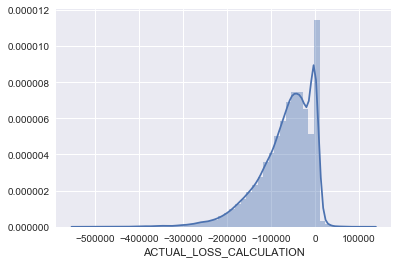

In [35]:
sns.distplot(df.ACTUAL_LOSS_CALCULATION.dropna())

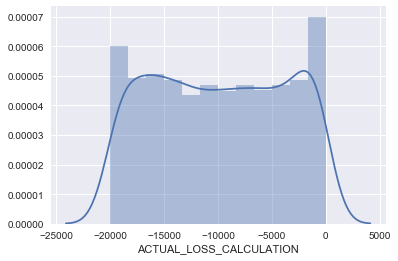

In [36]:
sns.distplot(df.ACTUAL_LOSS_CALCULATION.dropna()[(df.ACTUAL_LOSS_CALCULATION.dropna() > -20000) & (df.ACTUAL_LOSS_CALCULATION.dropna() < 0)])

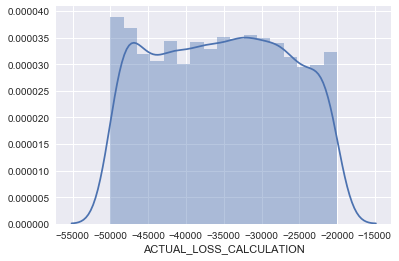

In [37]:
sns.distplot(df.ACTUAL_LOSS_CALCULATION.dropna()[(df.ACTUAL_LOSS_CALCULATION.dropna() > -50000) & (df.ACTUAL_LOSS_CALCULATION.dropna() < -20000)])

## MODIFICATION COST
The cumulative modification cost amount calculated when Freddie Mac determines such mortgage loan has experienced a rate modification event. Modification Cost is applicable for loans with rate changes only. This amount will be calculated on a monthly basis beginning with the first reporting period a modification event is reported, and disclosed in the last performance record.

For example:

(Original Interest Rate/1200 * Current Actual UPB) – (Current Interest Rate/1200 * (sum(Current Actual UPB, -Current Deferred UPB)) and aggregate each month since modification through the Performance Cutoff Date into a cumulative amount

## STEP MODIFICATION FLAG
A Y/N flag will be disclosed for every modified loan, to denote if the terms of modification agreement call for note rate to increase over time.
 